### In this project we’ll use the size of points to indicate the area and populations of California cities. We would like a legend that specifies the scale of the sizes of the points, and we’ll accomplish this by plotting some labeled data with no entries.

In [1]:
# Download Dataset
import requests

# URL of the CSV file
url = 'https://github.com/amankharwal/Californai-Cities/blob/master/california_cities.csv'

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Open a file in binary write mode
    with open('data.csv', 'wb') as f:
        # Write the content of the response to the file
        f.write(response.content)
    print('CSV file downloaded successfully')
else:
    print('Failed to download CSV file')


CSV file downloaded successfully


In [2]:
import pandas as pd
cities = pd.read_csv('california_cities.csv')
cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


### Extracting the data we need for further process

In [3]:
latitude, longitude = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

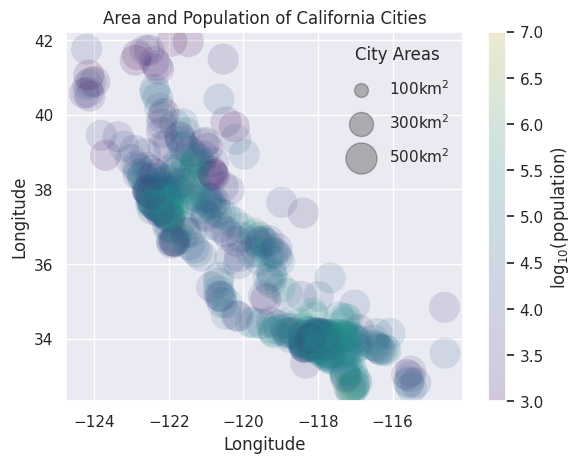

In [24]:
# to scatter the points, using size and color but without label
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
plt.scatter(longitude, latitude, label=None, c=np.log10(population),
            cmap='viridis', s=area, linewidth=0.01, alpha=0.15)
plt.axis('equal')
plt.xlabel('Longitude')
plt.ylabel('Longitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)
# now we will craete a legend, we will plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area, label=str(area) + 'km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Areas')
plt.title("Area and Population of California Cities")
plt.show()